# Creating a publication-quality boxplot (notebook)

For a more complete tutorial, please check: https://github.com/jbmouret/matplotlib_for_papers

**Objective:** Learn how to compare experimentally two stochastic algorithms (i.e., machine learning algorithms) and produce a figure for a scientific paper

*This tutorial relies on Python and the Matplotlib library* (not Matlab)


## Example of better vizualization

![Modularity boxplot](figs/example1_boxplot.png)

From: Clune*, Jeff, Jean-Baptiste Mouret*, and Hod Lipson. "The evolutionary origins of modularity." Proceedings of the Royal Society B: Biological sciences 280.1755 (2013): 20122863 [*: equal contribution].


## Use case for Box plot

You want to know if "treatment" (algorithm) 'A' performs better than treatment 'B'. Since your algorithm is stochastic, you have run replicates (at least 20!) to be sure that one treatment has not been lucky/unlucky, and you want statistically significant results.

Other use case: you measure some data (e.g., time to achieve a task) with 20 different user (user study), and you want to know if one approach works better than the other.

### Goal:

- Display the median and the quartiles
- Do not assume that your data are Gaussian (contrary to bars + error bars)

See: http://en.wikipedia.org/wiki/Box_plot

<img src="figs/wikipedia_boxplot.png" width="40%"/>




- Each box extends from the lower to upper quartile values of the data, with a symbol at the median.
- Whiskers extend to the most extreme data point within 1.5 * IQR, where IQR is the Inter Quartile Range.
- Flier points (outliers) are those past the end of the whiskers.

### Median vs mean

Using the mean + standard deviation assumes that your data are *normally distributed*. This assumption is usually wrong in "experimental" computer science. For instance, your algorithm may fail 30% of the time (performance = 0) and succeed 70% of the time (performance = 1): you have two peaks and the distribution is not Gaussian at all. In addition, the standard deviation assumes that the distribution is symmetric, which is clearly not the case when there is a maximum that cannot be exceeded.

 **You should always use the median and the 25% / 75% percentiles, unless you have good reason to think that your data are normally distributed**.


## Basics: our first boxplot


In [3]:
# first we need to install matplotlib
# this runs a shell command in a notebook
!pip install matplotlib

### Data
We assume that the data for each treatment is organized in a in text file (e.g., a CSV), with one file for each result

**File1:**
||
|---|
|0.1|
|0.24|
|...|

**File2:**
||
|---|
|0.13|
|0.11|
|...|


In [7]:
import numpy as np

# np.loadtxt loads a file as a numpy array
data_a = np.loadtxt('src/data_boxplot/a.txt')
data_b = np.loadtxt('src/data_boxplot/b.txt')

# here we have a single column
# for csv (comma separated values), you can use: np.loadtxt('src/data_boxplot/a.txt', delimiter=',')


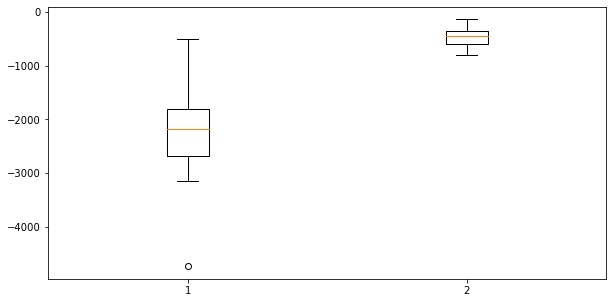

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
ax.boxplot([data_a, data_b])

fig.savefig('fig.pdf') # we create a PDF file for inclusion in a paper (vector format)

### Storing figures: Vector format versus bitmap format

- Vector formats (pdf, svg, eps): store the coordinates of graphic objects (e.g., lines, circles)


<img src="https://dev.w3.org/SVG/tools/svgweb/samples/svg-files/atom.svg" alt="svf" style="width: 240px;"/>


```svg
<svg xmlns="http://www.w3.org/2000/svg" viewBox="-52 -53 100 100" stroke-width="2">
 <g fill="none">
  <ellipse stroke="#66899a" rx="6" ry="44"/>
  <ellipse stroke="#e1d85d" rx="6" ry="44" transform="rotate(-66)"/>
  <ellipse stroke="#80a3cf" rx="6" ry="44" transform="rotate(66)"/>
  <circle stroke="#4b541f" r="44"/>
 </g>
 ...
</svg>
```
- Bitmap formats (png, jpg, bmp, ...): store the pixels (for jpg: lossy compression; for png: lossless compression)
```
P1
# feep.pbm
24 7
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
```

- **Vector formats are more appropriate for plots (except with millions of points):**
  - they are often smaller
  - you can zoom without ever "see the pixels"
  


# How to make this figure better?

<img src="figs/tufte_book_cover.png" width="200px" align="left" hspace="30" vspace="5">

Probably the most influential book about data vizualization:

Tufte, Edward R. *The visual display of quantitative information.*, 2nd edition, Cheshire, CT: Graphics press, 2001.

**Main principle:** maximize the data / ink ratio. In other words, minimize the visual clutter, or remove everything that is not useful to understand the data.

Example of bad vizualizations:
 - http://joeloughton.com/blog/wp-content/uploads/2011/04/chart13.gif [from: http://joeloughton.com/blog/]
 - http://www.forbes.com/sites/naomirobbins/2012/05/30/winner-of-the-bad-graph-contest-announced-2/

Examples of a better vizualization (according to Tufte):
 - http://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=00014g
 - http://joeloughton.com/blog/visualisations/tufte-bar-chart-redesign-in-jquery-flot/
 - http://blog.revolutionanalytics.com/2010/03/white-house-taps-edward-tufte-to-explain-the-stimulus.html

<center><img src="https://miro.medium.com/max/1400/1*_2SEqWI_sS3lleOgjUhiwQ.webp" width="50%"></center>




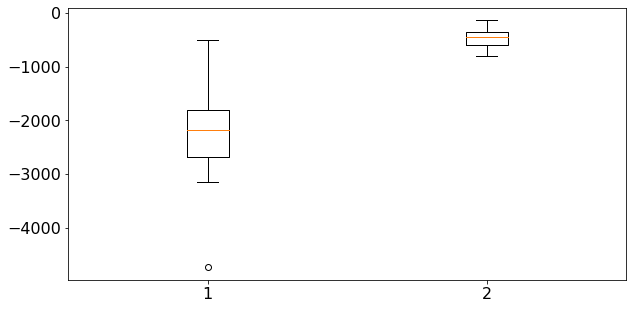

In [19]:
# As a rule of thumb, the font size of your labels should be close to the font size of the figure's caption.

# It is also a good idea to increase the linewidths, to be able to make the figure small:
import matplotlib as mpl

params = {
'axes.labelsize': 16,
'legend.fontsize': 16,
'xtick.labelsize': 16,
'ytick.labelsize': 16,
}
mpl.rcParams.update(params)


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
bp = ax.boxplot([data_a, data_b])



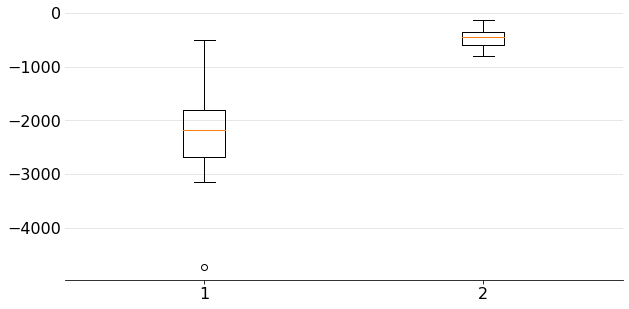

In [22]:
import matplotlib as mpl

params = {
'axes.labelsize': 16,
'legend.fontsize': 16,
'xtick.labelsize': 16,
'ytick.labelsize': 16,
}
mpl.rcParams.update(params)


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
bp = ax.boxplot([data_a, data_b])

# remove the frames 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', length=0)

# add a grid

ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
ax.set_axisbelow(True)

### Adding color...

In [ ]:

 from palettable.colorbrewer.qualitative import Set2_7
 colors = Set2_7.mpl_colors


[Text(1, 0, 'A'), Text(2, 0, 'B')]

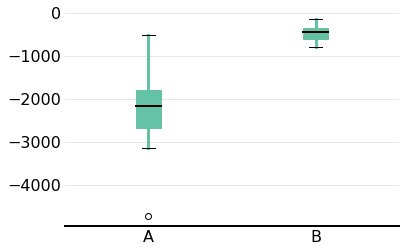

In [42]:
import matplotlib as mpl


from palettable.colorbrewer.qualitative import Set2_7
colors = Set2_7.mpl_colors

params = {
'axes.labelsize': 16,
'legend.fontsize': 16,
'xtick.labelsize': 16,
'ytick.labelsize': 16,
}
mpl.rcParams.update(params)


fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1,1,1)
bp = ax.boxplot([data_a, data_b], patch_artist=True)

# remove the frames 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
#ax.spines['bottom'].set_visible(False)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=0)

# add a grid

ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
ax.set_axisbelow(True)

c=colors[0]
for w in bp['whiskers']:
    w.set_color(c)
    w.set_linewidth(3)
for patch in bp['boxes']:
    patch.set_facecolor(c)
    patch.set_color(c)
for median in bp['medians']:
    median.set(color ='black',
                linewidth = 2)

ax.set_xticklabels(['A', 'B'])
#ax.xaxis.set_tick_params(fontproperties=)



## Adding the stars for statistical significance

When comparing two treatments, we usually use stars to represent the p-value that results from a (well-chosen) statistical test.  "Informally, a p-value is the probability under a specified statistical model that a statistical summary of the data (e.g., the sample mean difference between two compared groups) would be equal to or more extreme than its observed value" (https://amstat.tandfonline.com/doi/full/10.1080/00031305.2016.1154108#_i27)

P-values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone.


There are *parametric* statistical tests (which assumes that the distribution of the data is known) and *non-parametric* tests (which do not assume that the distribution is known). The classic Student's t-test (http://en.wikipedia.org/wiki/Student's_t-test) is a parametric test that only works when the data are normally distributed. *As explained before, data are rarely normally distributed when we compare algorithms* (but this is often the case in biology or in physics). A good non-parametric alternative to the t-test is the **Mann-Whitney U-test** (http://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) (called ranksum in matlab, or Wilcoxon test, or Man-Whitney-Wilcoxon).

In python, there is an implementation in Scipy (a scientific package on top of numpy; if you don't have it yet: sudo pip install scipy or apt-get install it):


In [43]:
!pip install scipy

In [50]:
import scipy.stats
_, p = scipy.stats.mannwhitneyu(data_a, data_b)
print(p)

9.918628618948002e-11


<img src="https://imgs.xkcd.com/comics/p_values_2x.png" width="300px"/>

### Why are p-values dangerous?
P-values compare the distributions... but not the effect size! 

A small p-values says that the two set of numbers are statistically different, but not that this difference is meaningful for your scientific experiment. In addition, be careful about all the uncertainty implied by the choice of the hyperparameters and the "fishing experiments".

In many cases, you can make the p-value smaller by adding replicates; but if you need 1 million replicates to see the difference between algorithm A and algorithm B, is it really interesting?

See: https://amstat.tandfonline.com/doi/full/10.1080/00031305.2016.1154108#_i27

<img src="https://imgs.xkcd.com/comics/significant.png" width="60%">

In [51]:
def stars(p):
    if p < 0.0001:
        return "****"
    elif (p < 0.001):
        return "***"
    elif (p < 0.01):
        return "**"
    elif (p < 0.05):
        return "*"
    else:
        return "-"


Text(1.5, 750, '****')

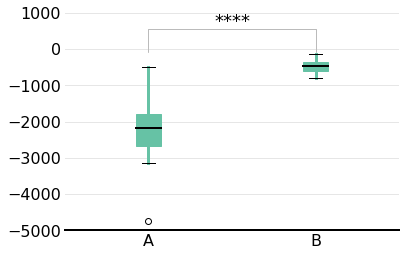

In [65]:
import matplotlib as mpl


from palettable.colorbrewer.qualitative import Set2_7
colors = Set2_7.mpl_colors

params = {
'axes.labelsize': 16,
'legend.fontsize': 16,
'xtick.labelsize': 16,
'ytick.labelsize': 16,
}
mpl.rcParams.update(params)


fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1,1,1)
bp = ax.boxplot([data_a, data_b], patch_artist=True)

# remove the frames 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
#ax.spines['bottom'].set_visible(False)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=0)

# add a grid

ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
ax.set_axisbelow(True)

c=colors[0]
for w in bp['whiskers']:
    w.set_color(c)
    w.set_linewidth(3)
for patch in bp['boxes']:
    patch.set_facecolor(c)
    patch.set_color(c)
for median in bp['medians']:
    median.set(color ='black',
                linewidth = 2)

ax.set_xticklabels(['A', 'B'])
ax.set_ylim((-5000, 1000))
_, p = scipy.stats.mannwhitneyu(data_a, data_b)
y_max = np.max(np.concatenate((data_a, data_b)))
ax.annotate("", xy=(1, y_max), xycoords='data',
        xytext=(2, y_max), textcoords='data',
        arrowprops=dict(arrowstyle="-", ec='#bbbbbb',
                        connectionstyle="bar,fraction=0.15"))
ax.text(1.5, 750, stars(p), horizontalalignment='center', verticalalignment='center')

